<a href="https://colab.research.google.com/github/Sanku1234/Data-Science-lab/blob/main/08_Decesiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datasets import load_dataset
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Load Iris dataset from Hugging Face
ds = load_dataset("hitorilabs/iris")  # Iris dataset hosted on HugginFace :contentReference[oaicite:1]{index=1}

# `ds["train"]` has data (no train/test split built in, but we can split)
df = pd.DataFrame(ds["train"])

print("Sample from dataset:")
print(df.head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-e6f8777399c691(…):   0%|          | 0.00/3.83k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/150 [00:00<?, ? examples/s]

Sample from dataset:
   petal_length  petal_width  sepal_length  sepal_width  species
0           1.4          0.2           5.1          3.5        0
1           1.4          0.2           4.9          3.0        0
2           1.3          0.2           4.7          3.2        0
3           1.5          0.2           4.6          3.1        0
4           1.4          0.2           5.0          3.6        0


In [ ]:

# 2. Prepare data
X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# 3. Train Decision Tree (ID3-style)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# 4. Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



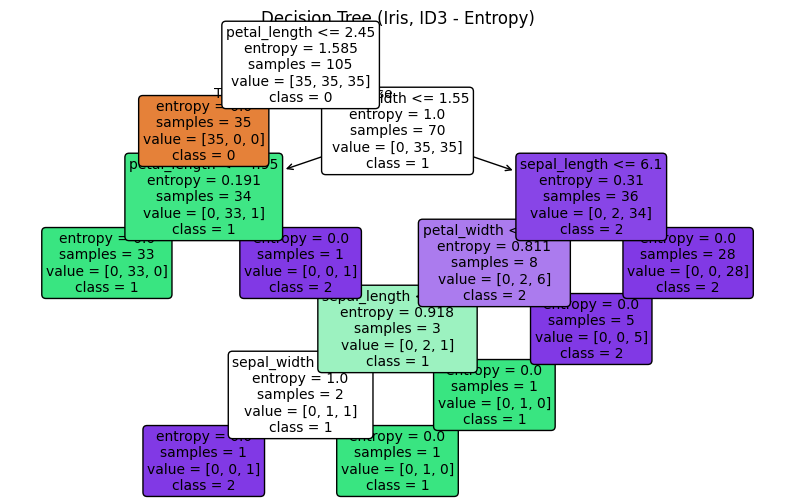

In [ ]:
# 5. Visualize tree
plt.figure(figsize=(10, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=list(map(str, model.classes_)),
    filled=True, rounded=True, fontsize=10
)
plt.title("Decision Tree (Iris, ID3 - Entropy)")
plt.show()

In [ ]:
# 6. Classify a new sample (✅ fixed order issue)
new_sample = pd.DataFrame([{
    "sepal_length": 5.1,
    "sepal_width": 3.5,
    "petal_length": 1.4,
    "petal_width": 0.2
}])[X.columns]  # reorder columns

prediction = model.predict(new_sample)
print("\nPrediction for new sample:", prediction[0])


Prediction for new sample: 0
